<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

<img alt="Buenos Aires" width="80%" src="https://www.remessaonline.com.br/blog/wp-content/uploads/2020/04/Compras-em-Buenos-Aires-veja-o-que-%C3%A9-vantajoso-comprar-na-Argentina_559272994.jpg">

Capital da Argentina e do Tango, Buenos Aires é uma das cidades mais visitadas do país. A cidade possui o mesmo fuso horário de Brasília e um ar que consegue ser ao mesmo tempo parecido e diferente do que se vê pelo Brasil. Buenos Aires tem muito a oferecer para os turistas que, é claro, sempre se encantam após
cada passeio. Seja no quesito história, na culinária, na grande quantidade de locais para conhecer e aproveitar durante a sua estadia ou ainda nas belas noites repletas de tango. 

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-01-29/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel  
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário (anfitrião da propriedade)
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listing_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60367,-58.40875,Entire home/apt,4364,3,1,2011-01-31,0.01,1,365
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,5233,2,26,2019-11-28,0.25,1,30
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,2357,1,20,2017-12-11,0.15,1,365
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2622,1,1,2018-12-18,0.04,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2622,1,0,NaN,NaN,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna,

Este *dataset* utilizado é a versão "resumida" obtida no Airbnb por meio do [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20558
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
As variáveis `reviews_per_month` e `last_review` possuem 30% dos seus valores faltantes.
As variáveis `host_name` e `name` têm aproximadamente 1% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.302753
last_review                       0.302753
host_name                         0.000632
name                              0.000243
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

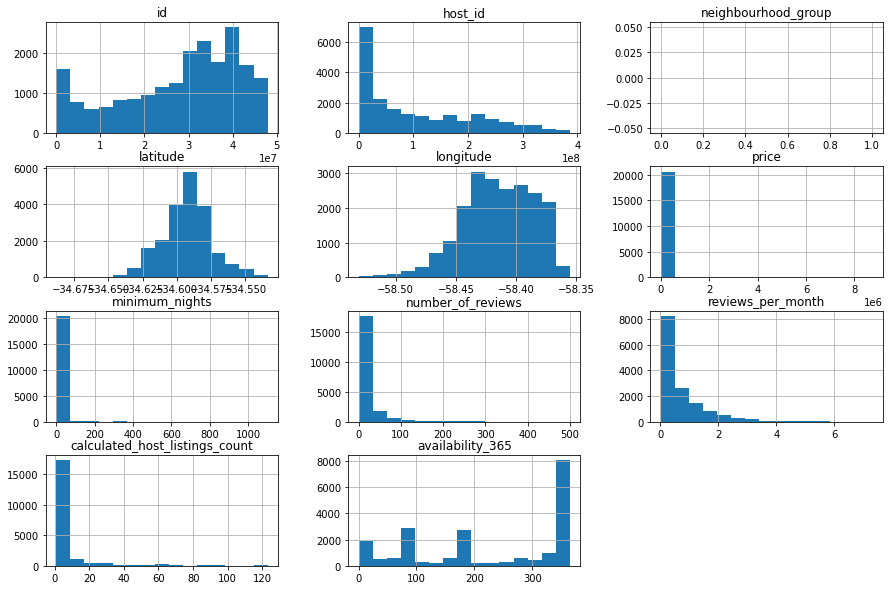

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [22]:
# Transformando a coluna price para o tipo float
df['price'] = df['price'].apply(lambda x: float(x))

In [23]:
# ver a média da coluna `price``
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.055800e+04,20558.000000,20558.000000,14334.000000,20558.000000,20558.000000
mean,4.933339e+03,6.558955,16.346872,0.681464,7.579434,227.945763
std,6.493995e+04,20.410624,33.530968,0.809547,17.485521,133.307178
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.573000e+03,2.000000,0.000000,0.130000,1.000000,90.000000
50%,2.500000e+03,3.000000,3.000000,0.380000,2.000000,248.000000
75%,3.928000e+03,5.000000,17.000000,0.940000,4.000000,364.000000
max,8.728293e+06,1100.000000,500.000000,7.310000,123.000000,365.000000


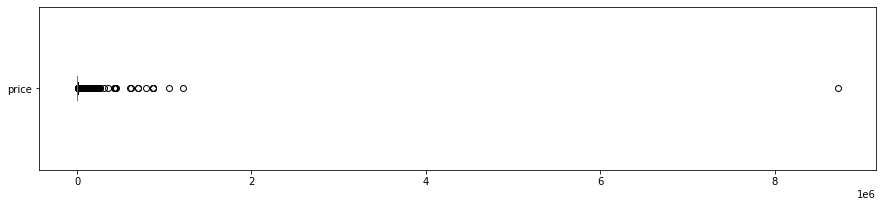


price: valores acima de 1500
15808 entradas
76.8946%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### **Q4. Qual a correlação existente entre as variáveis**

In [16]:
# criar uma matriz de correlação

# mostrar a matriz de correlação
df['price'].apply(lambda x: float(x))

0        4364.0
1        5233.0
2        2357.0
3        2622.0
4        2622.0
          ...  
20553    7000.0
20554    2118.0
20555    1216.0
20556    1000.0
20557    2095.0
Name: price, Length: 20558, dtype: float64

In [21]:
# plotar um heatmap a partir das correlações
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20553,47925858,Excelente piso en Caballito -Con cochera y pis...,13418716,Elena,NaN,Caballito,-34.61133,-58.44247,Entire home/apt,7000.0,7,0,NaN,NaN,1,337
20554,47926247,Great apartment in Recoleta ideal for long sta...,13354709,Carolina,NaN,Recoleta,-34.59431,-58.40399,Entire home/apt,2118.0,3,0,NaN,NaN,2,303
20555,47935040,Belgrano Center New Stylish Apartments - B,386124239,Leo,NaN,Belgrano,-34.55730,-58.44829,Entire home/apt,1216.0,3,0,NaN,NaN,2,174
20556,47936382,Excelente Departamento / Zona ideal,54771169,Nico,NaN,Retiro,-34.59375,-58.38564,Entire home/apt,1000.0,20,0,NaN,NaN,1,174
20557,47937963,Departamento perfecto en Nuñez. Conócelo.,49772774,Silvina,NaN,Nuñez,-34.55094,-58.46214,Entire home/apt,2095.0,1,0,NaN,NaN,7,176


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
